In [1]:
#https://medium.com/@h3ik0.th/temporal-fusion-transformer-unleashed-deep-forecasting-of-multivariate-time-series-in-python-674fa393821b
#https://github.com/LittlePey/SFD/issues/5
%pip install pytorch_forecasting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.4/141.4 kB 3.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 29.7 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.2/308.2 kB 8.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.1/890.1 MB 2.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.3/800.3 kB 7.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 kB 4.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 4.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 1.6 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 1.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
%pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.9/451.9 kB 8.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 7.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.4 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 970.0/970.0 kB 10.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 16.4 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.5/187.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 56.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0

In [4]:
%pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 4.5 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import missingno as mno

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)


from darts import TimeSeries, concatenate
from darts.dataprocessing.transformers import Scaler
from darts.models import TransformerModel
from darts.metrics import mape, rmse
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.likelihood_models import QuantileRegression


pd.set_option("display.precision",2)
np.set_printoptions(precision=2, suppress=True)
pd.options.display.float_format = '{:,.2f}'.format

In [50]:
import seaborn as sns
import os
import sys
import missingno as mno

pd.set_option("display.precision",2)
np.set_printoptions(precision=2, suppress=True)
pd.options.display.float_format = '{:,.2f}'.format

In [51]:
# import data 
import numpy as np
import pandas as df
np_folder = 'PRSA_preprocess/PRSA_Wanshouxigong_numpy'
np_split = np_folder.split('/')
np_file = np_split[1]
splitter = np_file.split('_')
display_name = splitter[0] + '_' + splitter[1]
hi = np.load('PRSA_preprocess/' + np_file + '.npy', allow_pickle=True)

dataframeee = df.DataFrame(hi)
dataframeee.columns = ['No', 'year', 'month','day', 'hour','PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
dataframeee.to_csv(display_name + '.csv', index=False) # comma separated

In [52]:
import pandas as pd
from datetime import datetime
import io

# load data
def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')
 
# dataset = pd.read_csv(io.BytesIO(uploaded[hello]),  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset = pd.read_csv(display_name + '.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.drop('No', axis=1, inplace=True)
dataset.drop('PM10', axis=1, inplace=True)
dataset.drop('SO2', axis=1, inplace=True)
dataset.drop('CO', axis=1, inplace=True)
dataset.drop('NO2', axis=1, inplace=True)
dataset.drop('O3', axis=1, inplace=True)
# for now drop station
dataset.drop('station', axis=1, inplace=True)
dataset.index.name = 'date'

print(dataset)

                     PM2.5  TEMP     PRES   DEWP  RAIN     wd  WSPM
date                                                               
2013-03-01 00:00:00   9.00  0.30 1,021.90 -19.00  0.00 292.50  2.00
2013-03-01 01:00:00  11.00 -0.10 1,022.40 -19.30  0.00 292.50  4.40
2013-03-01 02:00:00   8.00 -0.60 1,022.60 -19.70  0.00 292.50  4.70
2013-03-01 03:00:00   8.00 -0.70 1,023.50 -20.90  0.00 315.00  2.60
2013-03-01 04:00:00   8.00 -0.90 1,024.10 -21.70  0.00 292.50  2.50
...                    ...   ...      ...    ...   ...    ...   ...
2017-02-28 19:00:00  11.00 12.50 1,013.50 -16.20  0.00 315.00  2.40
2017-02-28 20:00:00  13.00 11.60 1,013.60 -15.10  0.00 292.50  0.90
2017-02-28 21:00:00  14.00 10.80 1,014.20 -13.30  0.00 315.00  1.10
2017-02-28 22:00:00  12.00 10.50 1,014.40 -12.90  0.00 337.50  1.20
2017-02-28 23:00:00  13.00  8.60 1,014.10 -15.90  0.00  22.50  1.30

[35064 rows x 7 columns]


In [53]:
# mark all NA values with 0
dataset['PM2.5'].fillna(0, inplace=True)
# drop the first 24 hours
#dataset = dataset[24:]
# summarize first 5 rows
# print(dataset.head(5))

# save to file
dataset.to_csv(display_name + '_pollution.csv')
print(dataset)

                     PM2.5  TEMP     PRES   DEWP  RAIN     wd  WSPM
date                                                               
2013-03-01 00:00:00   9.00  0.30 1,021.90 -19.00  0.00 292.50  2.00
2013-03-01 01:00:00  11.00 -0.10 1,022.40 -19.30  0.00 292.50  4.40
2013-03-01 02:00:00   8.00 -0.60 1,022.60 -19.70  0.00 292.50  4.70
2013-03-01 03:00:00   8.00 -0.70 1,023.50 -20.90  0.00 315.00  2.60
2013-03-01 04:00:00   8.00 -0.90 1,024.10 -21.70  0.00 292.50  2.50
...                    ...   ...      ...    ...   ...    ...   ...
2017-02-28 19:00:00  11.00 12.50 1,013.50 -16.20  0.00 315.00  2.40
2017-02-28 20:00:00  13.00 11.60 1,013.60 -15.10  0.00 292.50  0.90
2017-02-28 21:00:00  14.00 10.80 1,014.20 -13.30  0.00 315.00  1.10
2017-02-28 22:00:00  12.00 10.50 1,014.40 -12.90  0.00 337.50  1.20
2017-02-28 23:00:00  13.00  8.60 1,014.10 -15.90  0.00  22.50  1.30

[35064 rows x 7 columns]


In [54]:
# # mark all NA values with 0
# # dataset['PM2.5'].fillna(0, inplace=True)
# # dataset['TEMP'].fillna(0, inplace=True)
# # dataset['PRES'].fillna(0, inplace=True)
# # dataset['DEWP'].fillna(0, inplace=True)
# # dataset['RAIN'].fillna(0, inplace=True)
# # dataset['WSPM'].fillna(0, inplace=True)


# # drop the first 24 hours
# #dataset = dataset[24:]
# # summarize first 5 rows
# print(dataset.head(-1))

# # save to file
# dataset.to_csv('pollution.csv')

In [55]:
from matplotlib import pyplot
# load dataset
dataset = pd.read_csv(display_name + '_pollution.csv', header=0, index_col=0)

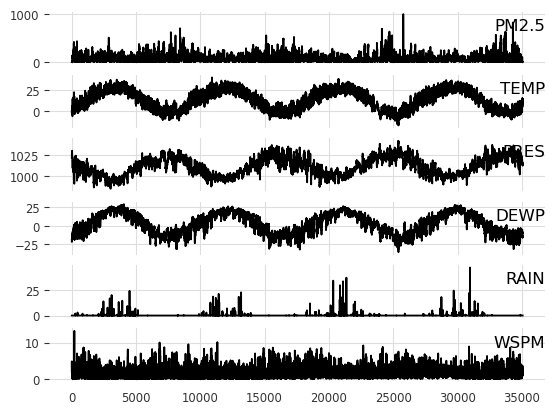

In [56]:
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3,  4, 6]
i = 1
# plot each column
pyplot.figure()
for group in groups:
  pyplot.subplot(len(groups), 1, i)
  #print("i: " + str(i) + ", " + str(values[:,group]))
  pyplot.plot(values[:, group])
  pyplot.title(dataset.columns[group], y=0.5, loc='right')
  i += 1
pyplot.show()

In [57]:
dataset.columns

Index(['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'], dtype='object')

In [58]:
values

array([[   9. ,    0.3, 1021.9, ...,    0. ,  292.5,    2. ],
       [  11. ,   -0.1, 1022.4, ...,    0. ,  292.5,    4.4],
       [   8. ,   -0.6, 1022.6, ...,    0. ,  292.5,    4.7],
       ...,
       [  14. ,   10.8, 1014.2, ...,    0. ,  315. ,    1.1],
       [  12. ,   10.5, 1014.4, ...,    0. ,  337.5,    1.2],
       [  13. ,    8.6, 1014.1, ...,    0. ,   22.5,    1.3]])

In [59]:
values[:,0]

array([ 9., 11.,  8., ..., 14., 12., 13.])

In [61]:
# Change WD to numbers
# Preprocessing
# integer encode direction
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# encoder = LabelEncoder()
# values[:,5] = encoder.fit_transform(values[:,5])
# values = values.astype('float32')
# type(values[:,5])


dataset['PM2.5'] = values[:,0]
dataset['TEMP'] = values[:,1]
dataset['PRES'] = values[:,2]
dataset['DEWP'] = values[:,3]
dataset['RAIN'] = values[:,4]
dataset['wd'] = values[:,5]
dataset['WSPM'] = values[:,6]

dataset.head(5)

,PM2.5,TEMP,PRES,DEWP,RAIN,wd,WSPM
date,,,,,,,
2013-03-01 00:00:00,9.00,0.30,"1,021.90",-19.00,0.00,292.50,2.00
2013-03-01 01:00:00,11.00,-0.10,"1,022.40",-19.30,0.00,292.50,4.40
2013-03-01 02:00:00,8.00,-0.60,"1,022.60",-19.70,0.00,292.50,4.70
2013-03-01 03:00:00,8.00,-0.70,"1,023.50",-20.90,0.00,315.00,2.60
2013-03-01 04:00:00,8.00,-0.90,"1,024.10",-21.70,0.00,292.50,2.50


In [62]:
# TIME SERIES OBJECT
# add date column
df1 = dataset.copy()

df1 = df1.reset_index()
df1['date'] = pd.to_datetime(df1.date, format='%Y-%m-%d %H:%M:%S')
df1.columns

Index(['date', 'PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'], dtype='object')

In [63]:
################################################
# create time series object for target variable
ts_P = TimeSeries.from_series(df1["PM2.5"]) 

# check attributes of the time series
print("components:", ts_P.components)
print("duration:",ts_P.duration)
print("frequency:",ts_P.freq)
print("frequency:",ts_P.freq_str)
print("has date time index? (or else, it must have an integer index):",ts_P.has_datetime_index)
print("deterministic:",ts_P.is_deterministic)
print("univariate:",ts_P.is_univariate)

components: Index(['PM2.5'], dtype='object', name='component')
duration: 35063
frequency: 1
frequency: None
has date time index? (or else, it must have an integer index): False
deterministic: True
univariate: True


In [64]:
# create time series object for the feature columns
df_covF = df1.loc[:, np.logical_and(df1.columns != "PM2.5",df1.columns != "date")]
ts_covF = TimeSeries.from_dataframe(df_covF)

# check attributes of the time series
print("components (columns) of feature time series:", ts_covF.components)
print("duration:",ts_covF.duration)
print("frequency:",ts_covF.freq)
print("frequency:",ts_covF.freq_str)
print("has date time index? (or else, it must have an integer index):",ts_covF.has_datetime_index)
print("deterministic:",ts_covF.is_deterministic)
print("univariate:",ts_covF.is_univariate)

components (columns) of feature time series: Index(['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM'], dtype='object', name='component')
duration: 35063
frequency: 1
frequency: None
has date time index? (or else, it must have an integer index): False
deterministic: True
univariate: False


In [65]:
# example: operating with time series objects:
# we can also create a 3-dimensional numpy array from a time series object
# 3 dimensions: time (rows) / components (columns) / samples
ar_covF = ts_covF.all_values()
print(type(ar_covF))
ar_covF.shape

<class 'numpy.ndarray'>


(35064, 6, 1)

In [66]:
# example: operating with time series objects:
# we can also create a pandas series or dataframe from a time series object
df_covF = ts_covF.pd_dataframe()
type(df_covF)
df_covF

component,TEMP,PRES,DEWP,RAIN,wd,WSPM
time,,,,,,
0,0.30,"1,021.90",-19.00,0.00,292.50,2.00
1,-0.10,"1,022.40",-19.30,0.00,292.50,4.40
2,-0.60,"1,022.60",-19.70,0.00,292.50,4.70
3,-0.70,"1,023.50",-20.90,0.00,315.00,2.60
4,-0.90,"1,024.10",-21.70,0.00,292.50,2.50
...,...,...,...,...,...,...
35059,12.50,"1,013.50",-16.20,0.00,315.00,2.40
35060,11.60,"1,013.60",-15.10,0.00,292.50,0.90
35061,10.80,"1,014.20",-13.30,0.00,315.00,1.10


In [67]:
LOAD = False         # True = load previously saved model from disk?  False = (re)train the model
SAVE = "\_TFT_model_02.pth.tar"   # file name to save the model under

SPLIT = 0.75         # train/test %

FIGSIZE = (9, 6)


qL1, qL2 = 0.01, 0.10        # percentiles of predictions: lower bounds
qU1, qU2 = 1-qL1, 1-qL2,     # upper bounds derived from lower bounds
label_q1 = f'{int(qU1 * 100)} / {int(qL1 * 100)} percentile band'
label_q2 = f'{int(qU2 * 100)} / {int(qL2 * 100)} percentile band'

mpath = os.path.abspath(os.getcwd()) + SAVE     # path and file name to save the model


In [68]:
# train/test split and scaling of target variable
#https://github.com/h3ik0th/ES_energy_Transformer/blob/main/TFT_energy_03.ipynb
# ts_p is the target variable
# train/test split and scaling of target variable
ts_train, ts_test = ts_P.split_after(SPLIT)
print("training start:", ts_train.start_time())
print("training end:", ts_train.end_time())
print("training duration:",ts_train.duration)
print("test start:", ts_test.start_time())
print("test end:", ts_test.end_time())
print("test duration:", ts_test.duration)


scalerP = Scaler()
scalerP.fit_transform(ts_train)
ts_ttrain = scalerP.transform(ts_train)
ts_ttest = scalerP.transform(ts_test)    
ts_t = scalerP.transform(ts_P)

# make sure data are of type float
ts_t = ts_t.astype(np.float32)
ts_ttrain = ts_ttrain.astype(np.float32)
ts_ttest = ts_ttest.astype(np.float32)

print("first and last row of scaled price time series:")
pd.options.display.float_format = '{:,.2f}'.format
ts_t.pd_dataframe().iloc[[0,-1]]

training start: 0
training end: 26297
training duration: 26297
test start: 26298
test end: 35063
test duration: 8765
first and last row of scaled price time series:


component,PM2.5
time,
0,0.01
35063,0.01


In [69]:
# print("\nYear:")
# print(df1.date)
# print(df1.date.dt.year.head())
# print("\nMonth:")
# print(df1.date.dt.month.head())
# print("\nDay:")
# print(df1.date.dt.day.head())
# print("\nHour:")
# print(df1.date.dt.hour.head())

In [70]:
# train/test split and scaling of feature covariates
covF_train, covF_test = ts_covF.split_after(SPLIT)

scalerF = Scaler()
scalerF.fit_transform(covF_train)
covF_ttrain = scalerF.transform(covF_train) 
covF_ttest = scalerF.transform(covF_test)   
covF_t = scalerF.transform(ts_covF)  

# make sure data are of type float
covF_ttrain = covF_ttrain.astype(np.float32)
covF_ttest = covF_ttest.astype(np.float32)

pd.options.display.float_format = '{:.2f}'.format
print("first and last row of scaled feature covariates:")
covF_t.pd_dataframe().iloc[[0,-1]]

first and last row of scaled feature covariates:


component,TEMP,PRES,DEWP,RAIN,wd,WSPM
time,,,,,,
0,0.30,0.65,0.26,0.00,0.87,0.15
35063,0.44,0.51,0.30,0.00,0.07,0.10


In [71]:
# create time series object for target variable
df1["hour"] =df1.date.dt.hour
df1["week"] =df1.date.dt.week
df1["month"] =df1.date.dt.month
df1["year"] =df1.date.dt.year

cov_date = TimeSeries.from_series(df1["hour"]) 
cov_week = TimeSeries.from_series(df1["week"]) 
cov_month = TimeSeries.from_series(df1["month"]) 
cov_year = TimeSeries.from_series(df1["year"]) 

# stack
cov_date = cov_date.stack(cov_week)
cov_date = cov_date.stack(cov_month)
cov_date = cov_date.stack(cov_year)
cov_date.columns
covT = cov_date

In [72]:
covT = covT.astype(np.float32)

# train/test split
covT_train, covT_test = covT.split_after(ts_train.end_time())


# rescale the covariates: fitting on the training set
scalerT = Scaler()
scalerT.fit(covT_train)
covT_ttrain = scalerT.transform(covT_train)
covT_ttest = scalerT.transform(covT_test)
covT_t = scalerT.transform(covT)

covT_t = covT_t.astype(np.float32)


pd.options.display.float_format = '{:.0f}'.format
print("first and last row of unscaled time covariates:")
covT.pd_dataframe().iloc[[0,-1]]

first and last row of unscaled time covariates:


component,hour,week,month,year
time,,,,
0,0,9,3,2013
35063,23,9,2,2017


In [73]:
ts_t.columns

Index(['PM2.5'], dtype='object', name='component')

In [74]:
# combine feature and time covariates along component dimension: axis=1
ts_cov = ts_covF.concatenate( covT.slice_intersect(ts_covF), axis=1 )                      # unscaled F+T
cov_t = covF_t.concatenate( covT_t.slice_intersect(covF_t), axis=1 )                       # scaled F+T
cov_ttrain = covF_ttrain.concatenate( covT_ttrain.slice_intersect(covF_ttrain), axis=1 )   # scaled F+T training set
cov_ttest = covF_ttest.concatenate( covT_ttest.slice_intersect(covF_ttest), axis=1 )       # scaled F+T test set


pd.options.display.float_format = '{:.2f}'.format
print("first and last row of unscaled covariates:")
cov_t.pd_dataframe().iloc[[0,-1]]
cov_t.columns

first and last row of unscaled covariates:


Index(['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'hour', 'week', 'month',
       'year'],
      dtype='object', name='component')

In [75]:
cov_ttrain.pd_dataframe().iloc[[0,-1]]

component,TEMP,PRES,DEWP,RAIN,wd,WSPM,hour,week,month,year
time,,,,,,,,,,
0,0.30,0.65,0.26,0.00,0.87,0.15,0.00,0.15,0.18,0.00
26297,0.34,0.72,0.29,0.00,0.53,0.15,0.74,0.15,0.09,1.00


In [76]:
# understanding covariates https://unit8.com/resources/time-series-forecasting-using-past-and-future-external-data-with-darts/
EPOCHS = 5
INLEN = 48          # input size
FEAT = 48           # d_model = number of expected features in the inputs, up to 512    
HEADS = 8           # default 8
ENCODE = 12         # encoder layers
DECODE = 12         # decoder layers
DIM_FF = 512        # dimensions of the feedforward network, default 2048
BATCH = 16          # batch size
ACTF = "relu"       # activation function, relu (default) or gelu
SCHLEARN = None     # a PyTorch learning rate scheduler; None = constant rate
LEARN = 1e-4        # learning rate
VALWAIT = 1         # epochs to wait before evaluating the loss on the test/validation set
DROPOUT = 0.1       # dropout rate
N_FC = 24            # output size

RAND = 58           # random seed
N_SAMPLES = 100     # number of times a prediction is sampled from a probabilistic model
N_JOBS = 3          # parallel processors to use;  -1 = all processors

# default quantiles for QuantileRegression
QUANTILES = [ 0.2, 0.5, 0.8]

In [77]:
model = TransformerModel(
                    input_chunk_length = INLEN,
                    output_chunk_length = N_FC,
                    batch_size = BATCH,
                    n_epochs = EPOCHS,
                    model_name = "Transformer_PM2.5",
                    nr_epochs_val_period = VALWAIT,
                    d_model = FEAT,
                    nhead = HEADS,
                    num_encoder_layers = ENCODE,
                    num_decoder_layers = DECODE,
                    dim_feedforward = DIM_FF,
                    dropout = DROPOUT,
                    activation = ACTF,
                    random_state=RAND,
                    likelihood=QuantileRegression(quantiles=QUANTILES), 
                    optimizer_kwargs={'lr': LEARN},
                    save_checkpoints=True,
                    force_reset=True
                    )

In [78]:
%pip install -Uqq ipdb
import ipdb

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# training: load a saved model or (re)train
if LOAD:
    print("have loaded a previously saved model from disk:" + mpath)
    model = TransformerModel.load_model(mpath)                            # load previously model from disk 
else:
    model.fit(  ts_ttrain, 
                past_covariates=cov_ttrain, 
                verbose=True)
    print("have saved the model after training:", mpath)
    model.save_model(mpath)

Epoch 3:  50%|████▉     | 813/1640 [13:14<13:28,  1.02it/s, loss=0.0541, train_loss=0.0596] 

In [ ]:
%%capture
ts_tpred = model.historical_forecasts(
    ts_t,
    past_covariates=cov_t,
    start=0.75,
    forecast_horizon=24,
    stride=1,
    retrain=False,
    verbose=True,
)
# takes long time to do

In [ ]:
# unscale
ts_q = scalerP.inverse_transform(ts_tpred)

ts_P.plot(label="actual")
ts_q.plot(label="forecast")
plt.legend()
print("RMSE (using covariates) = {:.2f}".format(rmse(ts_P, ts_q)))

In [ ]:
# retrieve forecast series for chosen quantiles, 
# inverse-transform each series,
# insert them as columns in a new dataframe dfY
# q50_RMSE = np.inf
# q50_MAPE = np.inf
# ts_q50 = None
# pd.options.display.float_format = '{:,.2f}'.format
# dfY = pd.DataFrame()
# dfY["Actual"] = TimeSeries.pd_series(ts_test)


# # helper function: get forecast values for selected quantile q and insert them in dataframe dfY
# def predQ(ts_t, q):
#     ts_q = scalerP.inverse_transform(ts_t)
#     s = TimeSeries.pd_series(ts_q)
#     header = "Q" + format(int(q*100), "02d")
#     dfY[header] = s
#     if q==0.5:
#         ts_q50 = ts_q
#         q50_RMSE = rmse(ts_q50, ts_test)
#         q50_MAPE = mape(ts_q50, ts_test) 
#         print("RMSE:", f'{q50_RMSE:.2f}')
#         print("MAPE:", f'{q50_MAPE:.2f}')
  
    
# # call helper function predQ, once for every quantile
# _ = [predQ(ts_tpred, q) for q in QUANTILES]

# # move Q50 column to the left of the Actual column
# col = dfY.pop("Q50")
# dfY.insert(1, col.name, col)
# dfY.iloc[np.r_[0:2, -2:0]]


In [ ]:
# plot the forecast
# plt.figure(100, figsize=(20, 7))
# sns.set(font_scale=1.3)
# p = sns.lineplot(x = "time", y = "Q50", data = dfY, palette="coolwarm")
# sns.lineplot(x = "time", y = "Actual", data = dfY, palette="coolwarm")
# plt.legend(labels=["forecast median PM2.5 Q50", "PM2.5"])
# p.set_ylabel("PM2.5")
# p.set_xlabel("")
# p.set_title("PM2.5 50th quantile");